Due Credits to:

Titanic Best Working Classfier, authored by Sina, for comprehensive features engineering 

Check out that kernel here: https://www.kaggle.com/sinakhorami/titanic/titanic-best-working-classifier


We all get the idea of Titanic. It has been in books, movies, documentaries and etc. Ship hit iceberg, met its demise. But could there be more to the story? What about the survivors of Titanic? Are there properties that certain passengers had that helped in surviving the crash? This notebook will look deeper beyond the tip of the ice berg to investigate important attributes that could have boosted survival rates.

**Disclaimer**
This notebook does not go too far as to implement best practices such as cross-validating across different models and ensembling.
Rather, the aim of this notebook is for the author to familiarize with features engineering, data wrangling, implementing random forest and gradient boosting model.

Of course, any further suggestions for improvement are always welcomed. Feel free to contact @: 
alanchn31@gmail.com

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import seaborn as sns
%matplotlib inline

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
full_data = [df_train,df_test]

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Features Engineering**

We can combine Parch and SibSp into 1 column, known as number of family members (Familymem). 
In addition, drop SibSp and Parch columns:

In [6]:
for data_set in full_data:
    data_set["Familymem"] = data_set["SibSp"] + data_set["Parch"]
    data_set.drop(columns = ["SibSp","Parch"])

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familymem
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Regex should be used to extract title out of Name.

In [8]:
import re

In [9]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [10]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(df_train['Title'], df_train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [11]:
print(pd.crosstab(df_test['Title'], df_test['Sex']))

Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [12]:
df_test[df_test["Title"]=="Dona"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familymem,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,0,Dona


In [13]:
df_test.loc[df_test["Title"]=='Dona',"Title"] = "Mrs"

In [14]:
print(pd.crosstab(df_test['Title'], df_test['Sex']))

Sex     female  male
Title               
Col          0     2
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         73     0
Ms           1     0
Rev          0     2


**Data Wrangling:**

Create Dictionary to map each category of Embarked destination  and Sex to a numeric category:

In [15]:
for dataset in full_data:
    encoded_cols = {"Embarked":     {"C": 1, "S":2, "Q":3}, "Sex": {"male":1,"female":0} , 
                    "Title": {"Capt":1,"Col":2,"Countess":3,"Don":4,"Dr":5,"Jonkheer":6,
                             "Lady": 7, "Major": 8, "Master": 9, "Miss": 10, "Mlle": 11,
                             "Mme": 12,"Mr": 13, "Mrs": 14, "Ms": 15, "Rev": 16, "Sir": 17} }
    dataset.replace(encoded_cols, inplace=True)

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familymem,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1,13
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1,14
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0,10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,1,14
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0,0,13


**Imputing Missing Values:**

In [17]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Familymem        0
Title            0
dtype: int64

In [18]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Familymem        0
Title            0
dtype: int64

Cabin column should be dropped as it is subjective to interpretation (which makes it difficult to impute) and there are a large number of missing observations in both training and test sets.

Missing Value for Fare in test data can be imputed by mean.

This leaves Age which we must find a way to impute.

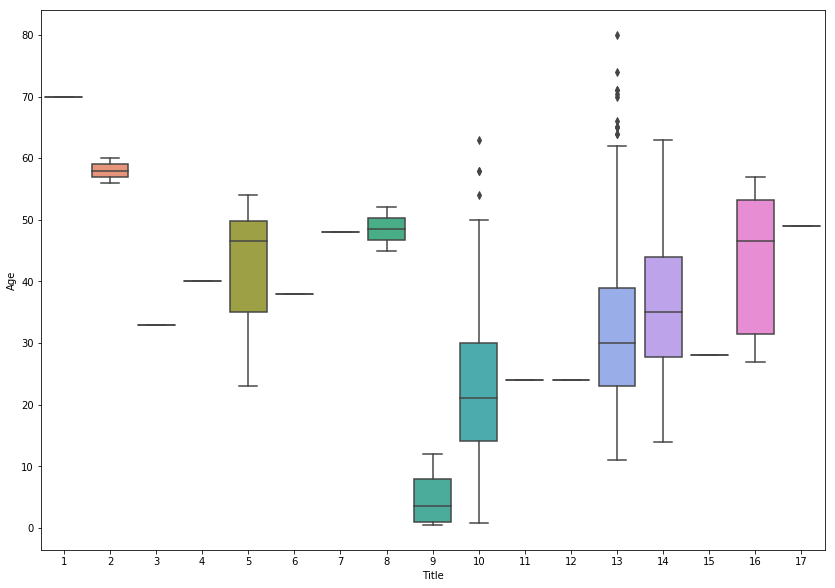

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Title",y="Age",data=df_train,ax=ax)
plt.tight_layout()

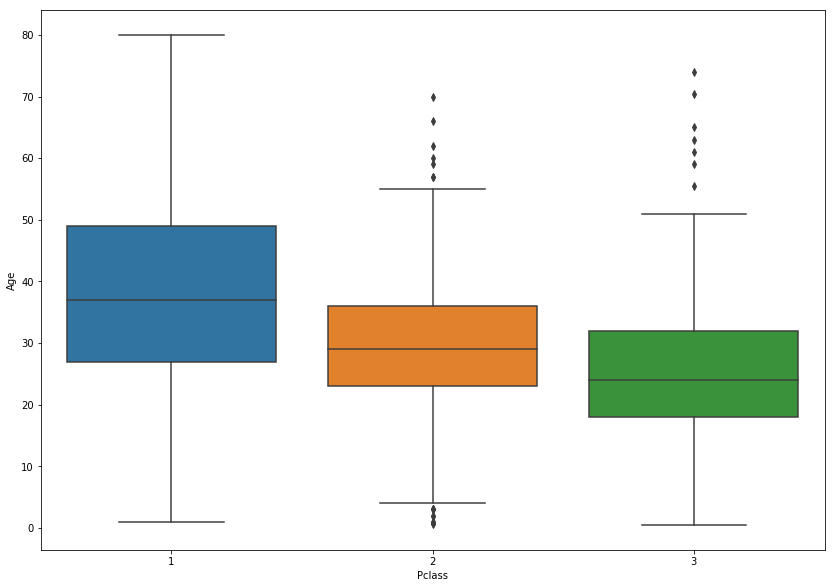

In [20]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Pclass",y="Age",data=df_train,ax=ax)
plt.tight_layout()

In [21]:
df_train.groupby(['Pclass','Title'])["Age"].mean()

Pclass  Title
1       1        70.000000
        2        58.000000
        3        33.000000
        4        40.000000
        5        43.750000
        6        38.000000
        7        48.000000
        8        48.500000
        9         5.306667
        10       30.000000
        11       24.000000
        12       24.000000
        13       41.580460
        14       40.882353
        17       49.000000
2       5        38.500000
        9         2.258889
        10       22.390625
        13       32.768293
        14       33.682927
        15       28.000000
        16       43.166667
3       9         5.350833
        10       16.123188
        13       28.724891
        14       33.515152
Name: Age, dtype: float64

Generally, the higher the ticket class, the older the person. Title helps to differentiate a person's Age as well. These are 2 important pieces of information that can allow us to impute Age.

In [22]:
for data_set in full_data:    
    data_set["Age"] = data_set.groupby(['Pclass','Title'])["Age"].transform(lambda x: x.fillna(x.mean()))

In [23]:
df_test.groupby(['Pclass','Title'])["Age"].mean()

Pclass  Title
1       2        50.000000
        5        53.000000
        9         9.500000
        10       31.428571
        13       41.200000
        14       45.411765
2       9         5.000000
        10       17.370000
        13       31.718182
        14       33.000000
        16       35.500000
3       9         7.454615
        10       19.872647
        13       27.198795
        14       29.875000
        15             NaN
Name: Age, dtype: float64

In [24]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Familymem        0
Title            0
dtype: int64

In [25]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Familymem        0
Title            0
dtype: int64

In [26]:
df_test[df_test["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familymem,Title
88,980,3,"O'Donoghue, Ms. Bridget",0,NaN,0,0,364856,7.75,NaN,3,0,15


In [27]:
df_test[df_test["Title"]==15]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familymem,Title
88,980,3,"O'Donoghue, Ms. Bridget",0,NaN,0,0,364856,7.75,NaN,3,0,15


Unable to impute 1 value (Class 3 with Title Ms), due to it being unique in the group. We will have to impute it by age of the person with title 'Ms' in our training data

In [28]:
df_test["Age"].fillna(28,inplace=True)

In [29]:
df_train["Age"].describe()

count    891.000000
mean      29.424948
std       13.544457
min        0.420000
25%       21.000000
50%       28.724891
75%       36.750000
max       80.000000
Name: Age, dtype: float64

In [30]:
df_test["Age"].describe()

count    418.000000
mean      29.631343
std       13.116544
min        0.170000
25%       22.000000
50%       27.198795
75%       36.375000
max       76.000000
Name: Age, dtype: float64

Great! We are left with Embarked and Fare to impute for training and test set respectively

For simplicity's sake, let's drop the rows with missing values of Embarked

In [31]:
df_train = df_train.dropna(subset=["Embarked"])

To impute the missing value of Fare in test data, we can just use mean

In [32]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [33]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Familymem        0
Title            0
dtype: int64

We can drop the Cabin columns for both training and test sets, given the substantial number of rows with missing values, 
along with the columns we do not need

In [34]:
train_id = df_train["PassengerId"]
test_id = df_test["PassengerId"]

In [35]:
for data_set in full_data:
    data_set.drop(columns=["PassengerId","Cabin","Name","SibSp","Parch","Ticket"],inplace=True)

In [36]:
df_train.drop(columns=["PassengerId","Cabin","Name","SibSp","Parch","Ticket"],inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familymem,Title
0,0,3,1,22.0,7.2500,2.0,1,13
1,1,1,0,38.0,71.2833,1.0,1,14
2,1,3,0,26.0,7.9250,2.0,0,10
3,1,1,0,35.0,53.1000,2.0,1,14
4,0,3,1,35.0,8.0500,2.0,0,13


**Exploratory Data Analysis**

Counts for Ports of Embarkation:

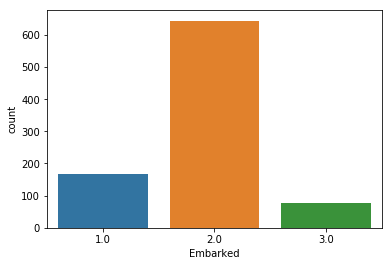

In [38]:
sns.countplot(x = "Embarked", data = df_train)

It seems that most people were heading for Southampton, followed by Cherbourg and then Queenstown

Counts for Cabin Number:

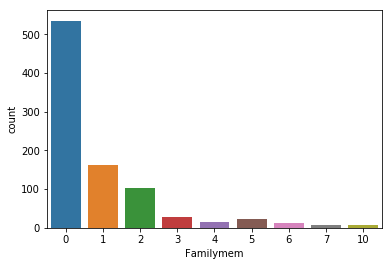

In [39]:
sns.countplot(x = "Familymem", data = df_train)

Most passengers boarded with less than 2 family members.
Majority of passengers boarder without any family members.

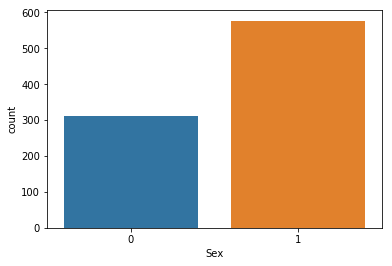

In [40]:
sns.countplot(x = "Sex", data = df_train)

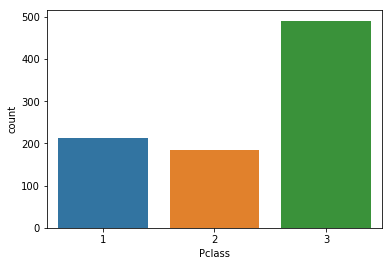

In [41]:
sns.countplot(x = "Pclass", data = df_train)

Most passengers were in 3rd class with majority of overall passengers being Male

**Training our Models:**

In [42]:
train_x = df_train.drop(columns=["Survived"])
train_y = df_train["Survived"]

Let's start our training with a random forest model!

Credits to: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 for its guidance towards cross-validation for a random forest model.


The most important settings for a random forest are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)

Let's try adjusting these hyperparameters:

1) n_estimators = number of trees in the foreset

2) max_features = max number of features considered for splitting a node

3) max_depth = max number of levels in each decision tree

4) min_samples_split = min number of data points placed in a node before the node is split

5) min_samples_leaf = min number of data points allowed in a leaf node

6) bootstrap = method for sampling data points (with or without replacement)

To do so, let's set up a parameter grid to sample:

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

The benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [44]:
from sklearn.ensemble import RandomForestClassifier

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_x, train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, boot

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   3.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000,

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.3s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.2min


[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   4.7s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   4.7s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   4.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.5min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [45]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 800}

In [46]:
rf_random.best_score_

0.8312710911136107

Our best cross-validation score is around 83.1%

In [47]:
clf = RandomForestClassifier(bootstrap=False,max_depth=30,max_features="sqrt",min_samples_leaf=2,min_samples_split=10,n_estimators=800)

In [48]:
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
preds_rf = clf.predict(df_test)

In [50]:
preds_rf

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
rf_submit = pd.DataFrame({"Survived": preds_rf,"PassengerId": test_id})

In [52]:
rf_submit = rf_submit[["PassengerId","Survived"]]

In [53]:
rf_submit.to_csv("submission_rf.csv",index=False)

Test accuracy is around 76% after submission

In [54]:
importances = clf.feature_importances_
features = ['Pclass','Sex','Age','Fare','Embarked','Familymem','Title']

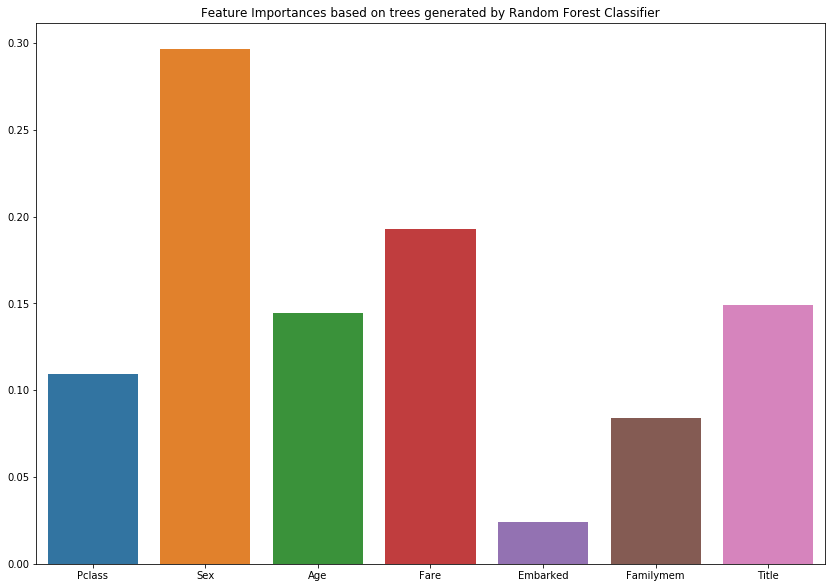

In [55]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Feature Importances based on trees generated by Random Forest Classifier')
sns.barplot(x=features,y=importances,ax=ax)
plt.tight_layout()

Next model that can be train is an XGBoost Classifier

In [56]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
preds_xgb = xgb_model.predict(df_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [58]:
preds_xgb

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
xgb_submit = pd.DataFrame({"Survived": preds_xgb,"PassengerId": test_id})
xgb_submit = xgb_submit[["PassengerId","Survived"]]
xgb_submit.to_csv("submission_xgb.csv",index=False)

XGBoost improved test accuracy to ~78.9%

Areas of Improvement:

* IsAlone (1 if passenger is alone and 0 if passenger is not) could be included in features engineering

* Cross-Validation could have been performed across different models such as RandomForest, AdaBoost, Decision Tree

* Ensembling could also be explored to boost accuracy score.